In [1]:
import utils
import ImageClassification as ic

c:\Users\lilywhite\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


data=26640, label=26640, trainingset=180, average_size=[4023.9757339338676, 4100.411432515495]


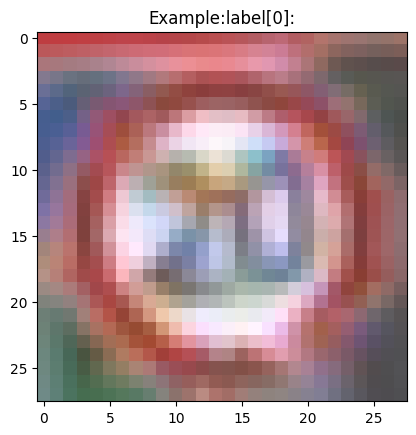

In [2]:
# data, label = utils.loadTrainData(image_size=(28,28), showExample=True)
data, label = utils.loadTrainData_Roi(image_size=(28,28), showExample=True)

In [3]:
X_train, X_test, y_train, y_test = utils.seperateDataset(data, label)

X_train=torch.Size([21312, 3, 28, 28]), X_test=torch.Size([5328, 3, 28, 28])
y_train=torch.Size([21312]), y_test=torch.Size([5328])


In [4]:
from torch import nn,optim
batch_size = 64  # batch大小
epoch_num = 40 # 训练轮次数
val_num = 5     # 训练几轮验证一次

model = ic.Net(image_size=(28,28))
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss, acc = ic.train(X_train, y_train, X_test, y_test, model,
                     loss_function, optimizer, batch_size, epoch_num, val_num, output_log=False)

c:\Users\lilywhite\.conda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[2025-04-02 17:14:05] epoch 5 | loss:0.2640 | acc:0.9150 | time:95.65s
[2025-04-02 17:15:43] epoch 10 | loss:0.2081 | acc:0.9107 | time:97.11s
[2025-04-02 17:17:22] epoch 15 | loss:0.1787 | acc:0.9433 | time:97.91s
[2025-04-02 17:19:03] epoch 20 | loss:0.2980 | acc:0.9559 | time:99.65s
[2025-04-02 17:20:44] epoch 25 | loss:0.3116 | acc:0.9304 | time:99.74s
[2025-04-02 17:22:26] epoch 30 | loss:0.5121 | acc:0.9413 | time:100.58s
[2025-04-02 17:24:06] epoch 35 | loss:0.6608 | acc:0.9587 | time:99.60s
[2025-04-02 17:25:47] epoch 40 | loss:0.2410 | acc:0.9604 | time:99.32s
Finished Training! BATCH_SIZE=64, EPOCH=40, VAL_NUM=5


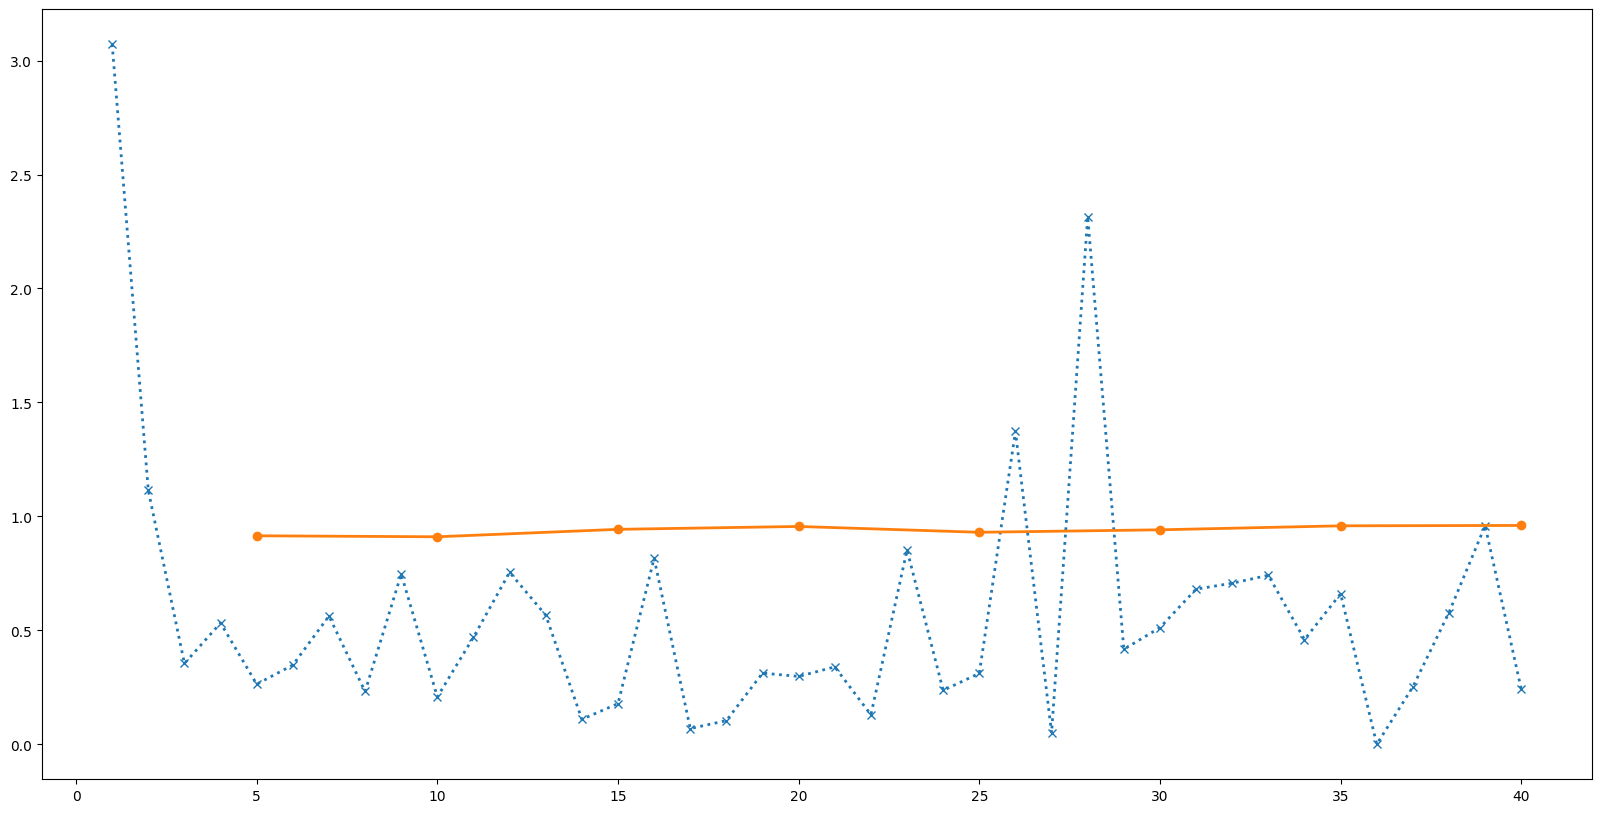

In [5]:
utils.illustrate(loss, acc, saveFig="ModelTraning.png")

In [6]:
# test = utils.loadTestData(showExample=False)
test = utils.loadTestData_Roi(showExample=False)

UnboundLocalError: local variable 'label' referenced before assignment

In [ ]:
utils.predict(model, test, showExample=True)